# Data Preprocessing

In [71]:
import re
import pandas as pd
from contractions import fix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
sns.set()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arbru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## X dataset

In [18]:
x_df = pd.read_csv('../data/annotated/annotated_x_data.csv')
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2042 non-null   int64 
 1   Username            2042 non-null   object
 2   Country_Code        8 non-null      object
 3   Possibly_Sensitive  2042 non-null   bool  
 4   Date_Created        2042 non-null   object
 5   No_of_Likes         2042 non-null   int64 
 6   Source              1985 non-null   object
 7   Full_Text           2042 non-null   object
 8   index               2042 non-null   int64 
 9   label               2042 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 145.7+ KB


In [19]:
x_df.describe()

,Unnamed: 0,No_of_Likes,index
count,2042.000000,2042.000000,2042.000000
mean,1020.500000,7.743879,1020.500000
std,589.618945,78.573867,589.618945
min,0.000000,0.000000,0.000000
25%,510.250000,0.000000,510.250000
50%,1020.500000,0.000000,1020.500000
75%,1530.750000,1.000000,1530.750000
max,2041.000000,1530.000000,2041.000000


In [20]:
x_df.isnull().sum()

Unnamed: 0               0
Username                 0
Country_Code          2034
Possibly_Sensitive       0
Date_Created             0
No_of_Likes              0
Source                  57
Full_Text                0
index                    0
label                    0
dtype: int64

In [21]:
print(f"Duplicates: {x_df.duplicated().sum()}")

Duplicates: 0


In [22]:
x_df.drop(['Unnamed: 0', 'index'],axis='columns', inplace=True)

In [23]:
x_df

,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label
0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,not-hate
1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,not-hate
2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,not-hate
3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,not-hate
4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,not-hate
...,...,...,...,...,...,...,...,...
2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,not-hate
2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,not-hate
2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",not-hate
2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,not-hate


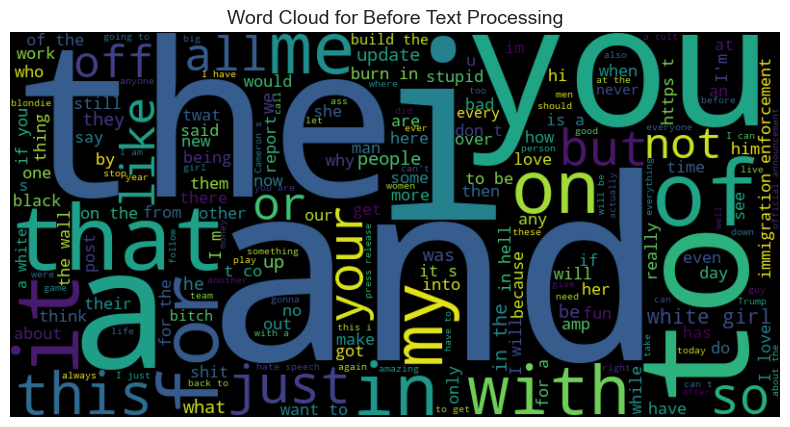

In [72]:
from wordcloud import WordCloud

text_data = " ".join(x_df["Full_Text"].astype(str))
banned_words = {"fuck", "fucking"}

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    stopwords=banned_words
).generate(text_data)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Before Text Processing", fontsize=14)
plt.show()


In [24]:
def clean_text(text):
    """
    Function that removes @, special characters or hashtags.
    """
    text = text.lower()
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

x_df["cleaned_text"] = x_df["Full_Text"].astype(str).apply(clean_text)
x_df.tail(30)

,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,cleaned_text
2012,rencgades,NaN,False,2025-03-18 22:33:44+00:00,0,X,my immune system has actually decided to fuck ...,not-hate,my immune system has actually decided to fuck ...
2013,overtimenicco8,NaN,False,2025-03-18 22:33:41+00:00,14,X,"Wren was completely blindsided, he wouldn’t ha...",not-hate,wren was completely blindsided he wouldnt have...
2014,MYL2710,NaN,False,2025-03-18 22:33:37+00:00,0,X,Fuck @realDonaldTrump @netanyahu @elonmusk and...,not-hate,fuck and fuck the nation of israel and f...
2015,moistcroutons,NaN,False,2025-03-18 22:33:24+00:00,0,X,sometimes thumbs up does mean fuck you,not-hate,sometimes thumbs up does mean fuck you
2016,imoutofmilk,NaN,False,2025-03-18 22:33:17+00:00,0,X,Everybody fuck off everybody fuck up off me,not-hate,everybody fuck off everybody fuck up off me
2017,casualchems,NaN,False,2025-03-18 22:32:41+00:00,0,X,I HATE HIM I HATE CHARLIE BUSHNELL FUCK YOU FO...,not-hate,i hate him i hate charlie bushnell fuck you fo...
2018,Holistone,NaN,False,2025-03-18 22:32:01+00:00,0,X,There's a high chance my mom's gonna be dead b...,not-hate,theres a high chance my moms gonna be dead by ...
2019,MeerRackz,NaN,False,2025-03-18 22:31:44+00:00,0,X,How the fuck you remove ts😭,not-hate,how the fuck you remove ts
2020,cxvvvowo,NaN,False,2025-03-18 22:31:33+00:00,2,X,fuck you lilly chou chou tiktok fans 🤣😂😂,not-hate,fuck you lilly chou chou tiktok fans
2021,delusional_diva,NaN,False,2025-03-18 22:31:07+00:00,4,X,fuck you.,not-hate,fuck you


In [25]:
from wordsegment import load, segment

load()

def fix_hashtags(text):
    words = text.split()
    processed_words = []
    
    for word in words:
        if word.startswith("#"):
            clean_word = word[1:]  
            
            if re.search(r'[A-Z]', clean_word):
                clean_word = re.sub(r'([a-z])([A-Z])', r'\1 \2', clean_word)
            else:
                clean_word = " ".join(segment(clean_word))
            
            processed_words.append(clean_word)
        else:
            processed_words.append(word)

    return " ".join(processed_words)

x_df["cleaned_text"] = x_df["cleaned_text"].astype(str).apply(fix_hashtags)
x_df

,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,cleaned_text
0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,not-hate,once again and claim to be about free speech b...
1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,not-hate,leftists dont ban hate speech they ban speech ...
2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,not-hate,to anyone on vrchat o would say at this time o...
3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,not-hate,saturday mornings earth odyssey and nbc commer...
4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,not-hate,was gonna relapse but my bf gave a huge hate s...
...,...,...,...,...,...,...,...,...,...
2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,not-hate,fuck you
2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,not-hate,when i say fuck you all together just know i g...
2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",not-hate,fuck you elon bring back the dropkick murphys ...
2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,not-hate,fuck you


In [26]:

x_df["cleaned_text"] = x_df["cleaned_text"].apply(fix)
x_df

,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,cleaned_text
0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,not-hate,once again and claim to be about free speech b...
1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,not-hate,leftists do not ban hate speech they ban speec...
2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,not-hate,to anyone on vrchat o would say at this time o...
3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,not-hate,saturday mornings earth odyssey and nbc commer...
4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,not-hate,was going to relapse but my bf gave a huge hat...
...,...,...,...,...,...,...,...,...,...
2037,JkittenYT,NaN,False,2025-03-18 22:27:36+00:00,0,X,Fuck you,not-hate,fuck you
2038,phattFoxx_,NaN,False,2025-03-18 22:27:33+00:00,1,X,When I say fuck you all together just know I g...,not-hate,when i say fuck you all together just know i g...
2039,satan_life,NaN,False,2025-03-18 22:27:31+00:00,0,X,"Fuck you, Elon. Bring back the Dropkick Murphy...",not-hate,fuck you elon bring back the dropkick murphys ...
2040,__marjestic,NaN,False,2025-03-18 22:27:26+00:00,0,X,Fuck you,not-hate,fuck you


In [27]:
x_df["tokens"] = x_df["cleaned_text"].apply(word_tokenize)
print(x_df[["cleaned_text", "tokens"]].head())

                                        cleaned_text  \
0  once again and claim to be about free speech b...   
1  leftists do not ban hate speech they ban speec...   
2  to anyone on vrchat o would say at this time o...   
3  saturday mornings earth odyssey and nbc commer...   
4  was going to relapse but my bf gave a huge hat...   

                                              tokens  
0  [once, again, and, claim, to, be, about, free,...  
1  [leftists, do, not, ban, hate, speech, they, b...  
2  [to, anyone, on, vrchat, o, would, say, at, th...  
3  [saturday, mornings, earth, odyssey, and, nbc,...  
4  [was, going, to, relapse, but, my, bf, gave, a...  


In [28]:
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
x_df["tokens"] = x_df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])

In [29]:
lemmatizer = WordNetLemmatizer()

x_df["tokens"] = x_df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])
x_df["processed_text"] = x_df["tokens"].apply(lambda words: ' '.join(words))

In [30]:
x_df.head()

,Username,Country_Code,Possibly_Sensitive,Date_Created,No_of_Likes,Source,Full_Text,label,cleaned_text,tokens,processed_text
0,DevilHatman,NaN,False,2024-12-16 22:49:58+00:00,0,NaN,Once again @elonmusk and @X claim to be about ...,not-hate,once again and claim to be about free speech b...,"[claim, free, speech, reality, far, different,...",claim free speech reality far different not cr...
1,AmericanaMama_,NaN,False,2024-12-16 21:48:19+00:00,43,NaN,Leftists don't ban hate speech. \n\nThey ban s...,not-hate,leftists do not ban hate speech they ban speec...,"[leftist, not, ban, hate, speech, ban, speech,...",leftist not ban hate speech ban speech hate
2,AnubisVRC,NaN,False,2024-12-16 21:32:25+00:00,0,NaN,To anyone on Vrchat o would say at this time o...,not-hate,to anyone on vrchat o would say at this time o...,"[anyone, vrchat, would, say, time, year, put, ...",anyone vrchat would say time year put radical ...
3,RaviManickavas1,NaN,False,2024-12-16 21:29:31+00:00,0,NaN,Saturday Morning's Earth Odyssey and NBC Comme...,not-hate,saturday mornings earth odyssey and nbc commer...,"[saturday, morning, earth, odyssey, nbc, comme...",saturday morning earth odyssey nbc commercials...
4,usersnotreal,NaN,False,2024-12-16 21:23:28+00:00,0,NaN,Was gonna relapse but my bf gave a huge hate s...,not-hate,was going to relapse but my bf gave a huge hat...,"[going, relapse, bf, gave, huge, hate, speech,...",going relapse bf gave huge hate speech dm woul...


In [31]:
x_df[["processed_text", "label"]].to_csv("../data/processed/processed_x_dataset.csv", index=False)

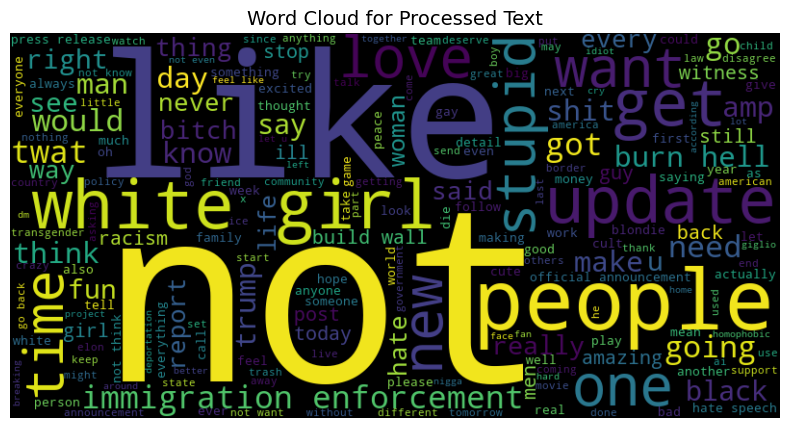

In [46]:
from wordcloud import WordCloud

text_data = " ".join(x_df["processed_text"].astype(str))
banned_words = {"fuck", "fucking"}

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    stopwords=banned_words
).generate(text_data)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Processed Text", fontsize=14)
plt.show()


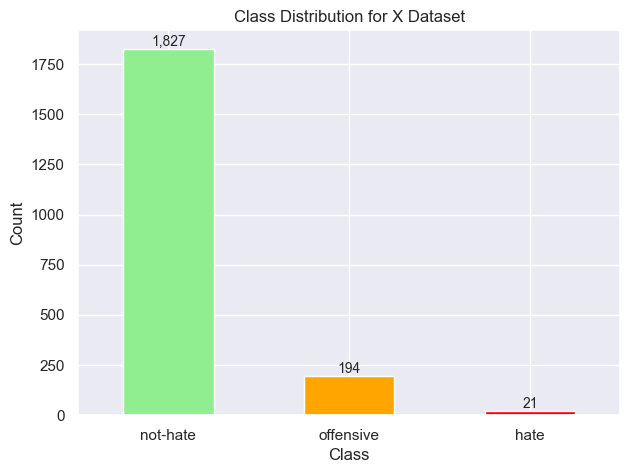

In [73]:
class_count = x_df['label'].value_counts()
plt.figure(figsize=(7,5))
bars = class_count.plot(kind='bar', color=['lightgreen','orange','red'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
    
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for X Dataset")
plt.xticks(rotation=0)
plt.show()

## Reddit dataset

In [64]:
reddit_df = pd.read_csv("../data/annotated/annotated_reddit_data.csv")
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46638 entries, 0 to 46637
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      46638 non-null  int64  
 1   title           46638 non-null  object 
 2   body            19125 non-null  object 
 3   author          46638 non-null  object 
 4   comment         46638 non-null  object 
 5   comment_author  38974 non-null  object 
 6   score           46638 non-null  int64  
 7   upvote_ratio    46638 non-null  float64
 8   created_utc     46638 non-null  object 
 9   subreddit       46638 non-null  object 
 10  index           46638 non-null  int64  
 11  label           46638 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.3+ MB


In [65]:
reddit_df.describe()

,Unnamed: 0,score,upvote_ratio,index
count,46638.000000,46638.000000,46638.000000,46638.000000
mean,23318.500000,12617.964149,0.871977,23318.500000
std,13463.375264,14429.522386,0.085995,13463.375264
min,0.000000,0.000000,0.450000,0.000000
25%,11659.250000,1389.000000,0.820000,11659.250000
50%,23318.500000,6913.000000,0.890000,23318.500000
75%,34977.750000,15098.000000,0.940000,34977.750000
max,46637.000000,50156.000000,1.000000,46637.000000


In [66]:
reddit_df.isnull().sum()

Unnamed: 0            0
title                 0
body              27513
author                0
comment               0
comment_author     7664
score                 0
upvote_ratio          0
created_utc           0
subreddit             0
index                 0
label                 0
dtype: int64

In [69]:
print(f"Duplicates: {reddit_df.duplicated().sum()}")

Duplicates: 0


In [75]:
reddit_class = reddit_df['label'].value_counts()

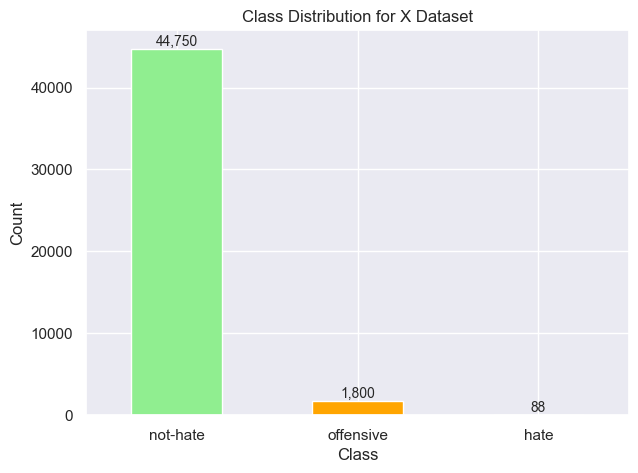

In [ ]:
plt.figure(figsize=(7,5))
reddit_bar = reddit_class.plot(kind='bar', color=['lightgreen','orange','red'])
for bar in reddit_bar.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Class Distribution for Reddit Dataset")
plt.xticks(rotation=0)
plt.show()